In [2]:
data_folder = "./data"
dataset_name = "garments_worker_productivity.csv"

import pandas as pd
import numpy as np

In [3]:
# Import data

data = pd.read_csv(data_folder + "/" + dataset_name)

data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:
min(data["actual_productivity"]), max(data["actual_productivity"])

(0.233705476, 1.1204375)

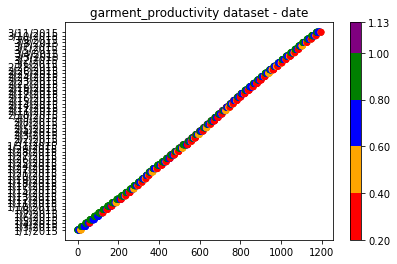

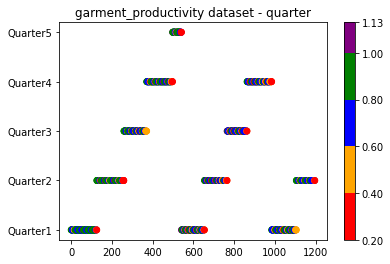

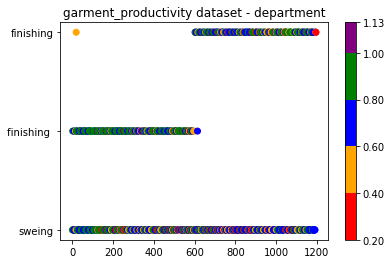

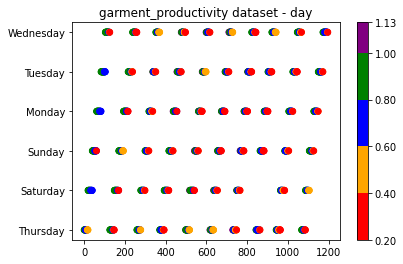

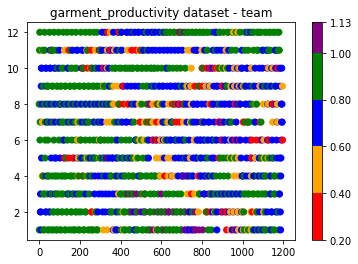

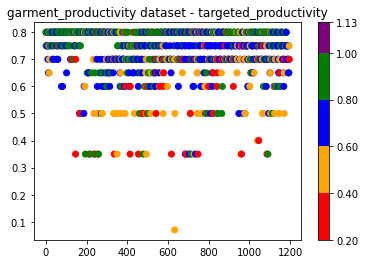

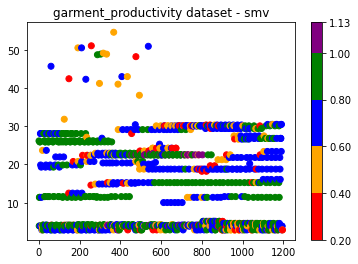

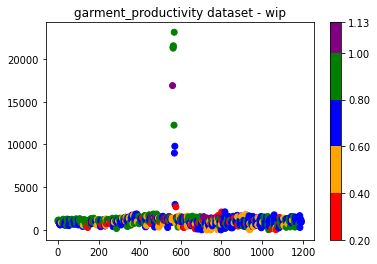

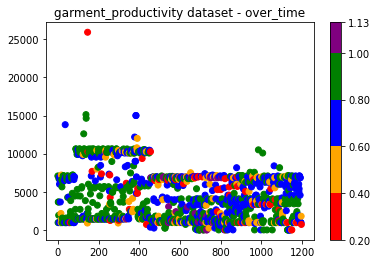

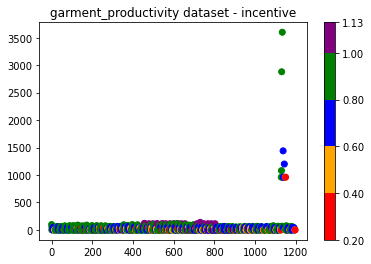

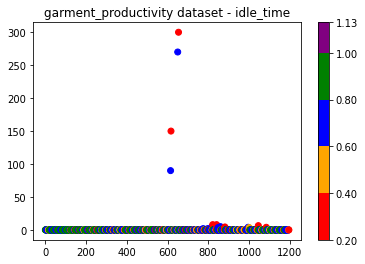

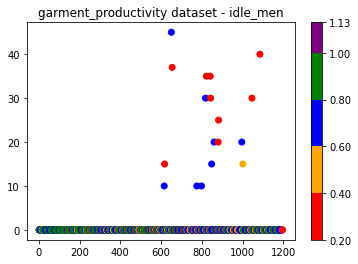

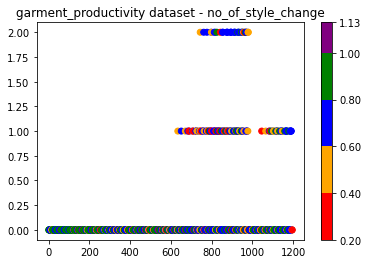

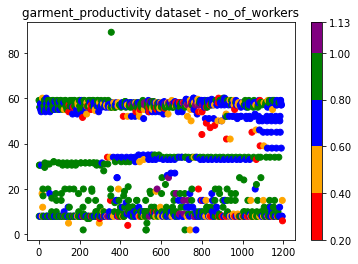

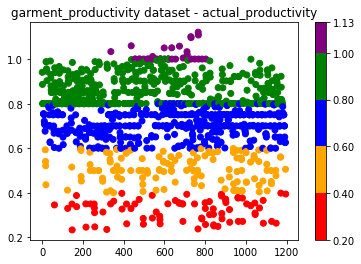

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

show_scatter = True
show_hist = False

boundaries = [0.2, 0.4, 0.6, 0.8, 1.0, 1.13]
colors = ["red","orange", "blue", "green", "purple"]
norm = BoundaryNorm(boundaries, len(colors))
cmap = ListedColormap(colors)

def scatter_attribute(data, dataset_name, attribute, solution):
    fig, ax = plt.subplots()
    ax.title.set_text(dataset_name + " dataset - " + attribute)
    graph = ax.scatter(data.index, data[attribute], c=data[solution],cmap=cmap, norm=norm)
    fig.colorbar(graph, spacing="proportional")
    
def hist_attribute(data, dataset_name, attribute, solution):
    fig, ax = plt.subplots()
    
    """
    # Histograms attempt
    ax.title.set_text(dataset_name + " dataset - " + attribute)
    graph = ax.hist(data, bins=[0.2, 0.4, 0.6, 0.8, 1.0, 1.13])
    """
    
    """
    # Another method for graphing data... but doesn't seem to
    # provide much customization
    ax.title.set_text(dataset_name + " dataset - " + attribute)
    graph_data = data.groupby(pd.cut(data[solution], boundaries))[attribute]
    graph_data.hist(ax=ax, alpha=0.4)
    """
    
    """
    # An attempt at graphing using masks. 
    fig, ax = plt.subplots()
    ax.title.set_text(dataset_name + " dataset - " + attribute)
    # Go through and generate bar graphs for each mask. 
    # Skip the first one. 
    for i in range(1, len(boundaries)):
        mask = data[solution] < boundaries[i]
        mask = mask > boundaries[i-1]
        graph = ax.bar(data.index[mask],data[attribute][mask], color=colors[i-1]) #c=data[solution],cmap=cmap, norm=norm)
        
    #fig.colorbar(graph, spacing="proportional")
    """
   
if show_scatter:
    for col in data:
        scatter_attribute(data, "garment_productivity", col, "actual_productivity")
        
if show_hist:
    for col in data:
        if col == "department":
            hist_attribute(data, "garment_productivity", col, "actual_productivity")


In [8]:
# Data Preprocessing 
# 1) fix department column
# 2) encode quarter, department, day columns
# 3) remove date + wip column (latter becuase of missing data)

data_modified = data.copy()

revised_department = []
for i in range(0, len(data_modified)):
    row = data_modified.iloc[i]
    if(row["department"] == "finishing "): 
        revised_department.append("finishing")
    else:
        revised_department.append(row["department"])
        
data_modified = data_modified.drop("department", axis=1)
data_modified["department"] = revised_department

# Drop WIP becuase of over 50% missing data
data_modified = data_modified.drop("wip", axis=1)
data_modified = data_modified.drop("date", axis=1)

data_numpy = data_modified.to_numpy()

data_rows, data_cols = data_numpy.shape

# Include all columns in X
X = data_numpy[:,0:data_cols]
Y = data_numpy[:,data_cols-2].astype("float")

# Remove solution col from X
X = np.delete(X, data_cols-2, 1)

X_rows, X_cols = X.shape

# Encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in range(0, X_cols):
    col = X[:,i]
    encode_col = False
    try:
        test_col = col.astype("float")
    except:
        encode_col = True
        
    if encode_col is True:
        X[:,i] = encoder.fit_transform(X[:,i])

X = X.astype("float")

# Encode Y, as we have some values that go above 1.0
# in the solution. 
#
# NOTE: We're going to try not encoding Y for simplicty's
# sake. 
"""
from sklearn.preprocessing import MinMaxScaler

encoder_y = MinMaxScaler(feature_range=(0,1))
Y = Y.reshape(-1, 1)
Y = encoder_y.fit_transform(Y)

Y
"""

Y = Y.astype("float")

Y

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

In [9]:
# Algorithm Spot Check - known algorithms 

nn_epochs = 200
nn_batch_size = 8
knn_n_neighbors = 5
knn_metric = "manhattan"
dt_criterion="mse"
rf_criterion="mse"
rf_n_estimators=150
rf_max_depth=None
svm_C = 1.0
svm_kernel = "rbf"
lasso_alpha=0.01

X_rows, X_cols = X.shape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso

def baseline_nn():
    model = Sequential()
    model.add(Dense(8, input_dim=X_cols, activation="relu"))
    #model.add(Dense(8, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
    return model

def baseline_knn():
    return KNeighborsRegressor(n_neighbors=knn_n_neighbors,metric=knn_metric)

# NOTE: GNB and MNB CAN be used for regression, but they're not
# plug in and play. TIL. These will not be used in my final spot
# check. 
def baseline_gnb():
    return GaussianNB()
def baseline_mnb():
    return MultinomialNB()

def baseline_dt():
    return DecisionTreeRegressor(criterion=dt_criterion)

def baseline_rf():
    return RandomForestRegressor(criterion=rf_criterion, n_estimators=rf_n_estimators, max_depth=rf_max_depth)

def baseline_svm():
    return SVR(C=svm_C, kernel=svm_kernel)

def baseline_lr():
    return LinearRegression()

def baseline_lasso():
    return Lasso(alpha=lasso_alpha)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

kfold = KFold(n_splits=10, shuffle=True)

def model_pipeline(model):
    estimators = []
    estimators.append(("standardize",StandardScaler()))
    estimators.append(("mlp", model))
    return Pipeline(estimators)

def model_evaluation(pipeline, model_name):
    result = cross_val_score(pipeline, X, Y, cv=kfold, scoring="neg_mean_squared_error")
    print("Baseline " + model_name + ": %.4f (%.4f)" % (-result.mean(),result.std()))


In [178]:
pipeline_nn = model_pipeline(KerasRegressor(build_fn=baseline_nn, epochs=nn_epochs, batch_size=nn_batch_size))
result_nn = cross_val_score(pipeline_nn, X, Y, cv=kfold, scoring="neg_mean_squared_error")

Epoch 1/200
135/135 [==============================] - 0s 911us/step - loss: 2.4452 - mse: 2.4452
Epoch 2/200
135/135 [==============================] - 0s 878us/step - loss: 0.7771 - mse: 0.7771
Epoch 3/200
135/135 [==============================] - 0s 901us/step - loss: 0.3824 - mse: 0.3824
Epoch 4/200
135/135 [==============================] - 0s 899us/step - loss: 0.2298 - mse: 0.2298
Epoch 5/200
135/135 [==============================] - 0s 863us/step - loss: 0.1510 - mse: 0.1510
Epoch 6/200
135/135 [==============================] - 0s 864us/step - loss: 0.1081 - mse: 0.1081
Epoch 7/200
135/135 [==============================] - 0s 901us/step - loss: 0.0817 - mse: 0.0817
Epoch 8/200
135/135 [==============================] - 0s 886us/step - loss: 0.0654 - mse: 0.0654
Epoch 9/200
135/135 [==============================] - 0s 875us/step - loss: 0.0553 - mse: 0.0553
Epoch 10/200
135/135 [==============================] - 0s 874us/step - loss: 0.0480 - mse: 0.0480
Epoch 11/200
135/13

135/135 [==============================] - 0s 902us/step - loss: 0.0164 - mse: 0.0164
Epoch 167/200
135/135 [==============================] - 0s 882us/step - loss: 0.0163 - mse: 0.0163
Epoch 168/200
135/135 [==============================] - 0s 872us/step - loss: 0.0165 - mse: 0.0165
Epoch 169/200
135/135 [==============================] - 0s 870us/step - loss: 0.0164 - mse: 0.0164
Epoch 170/200
135/135 [==============================] - 0s 892us/step - loss: 0.0163 - mse: 0.0163
Epoch 171/200
135/135 [==============================] - 0s 879us/step - loss: 0.0172 - mse: 0.0172
Epoch 172/200
135/135 [==============================] - 0s 913us/step - loss: 0.0165 - mse: 0.0165
Epoch 173/200
135/135 [==============================] - 0s 896us/step - loss: 0.0162 - mse: 0.0162
Epoch 174/200
135/135 [==============================] - 0s 930us/step - loss: 0.0166 - mse: 0.0166
Epoch 175/200
135/135 [==============================] - 0s 910us/step - loss: 0.0164 - mse: 0.0164
Epoch 176/200


135/135 [==============================] - 0s 842us/step - loss: 0.0175 - mse: 0.0175
Epoch 131/200
135/135 [==============================] - 0s 860us/step - loss: 0.0172 - mse: 0.0172
Epoch 132/200
135/135 [==============================] - 0s 830us/step - loss: 0.0172 - mse: 0.0172
Epoch 133/200
135/135 [==============================] - 0s 833us/step - loss: 0.0172 - mse: 0.0172
Epoch 134/200
135/135 [==============================] - 0s 824us/step - loss: 0.0171 - mse: 0.0171
Epoch 135/200
135/135 [==============================] - 0s 838us/step - loss: 0.0174 - mse: 0.0174
Epoch 136/200
135/135 [==============================] - 0s 845us/step - loss: 0.0174 - mse: 0.0174
Epoch 137/200
135/135 [==============================] - 0s 836us/step - loss: 0.0176 - mse: 0.0176
Epoch 138/200
135/135 [==============================] - 0s 831us/step - loss: 0.0173 - mse: 0.0173
Epoch 139/200
135/135 [==============================] - 0s 837us/step - loss: 0.0172 - mse: 0.0172
Epoch 140/200


135/135 [==============================] - 0s 836us/step - loss: 0.0178 - mse: 0.0178
Epoch 95/200
135/135 [==============================] - 0s 831us/step - loss: 0.0179 - mse: 0.0179
Epoch 96/200
135/135 [==============================] - 0s 877us/step - loss: 0.0177 - mse: 0.0177
Epoch 97/200
135/135 [==============================] - 0s 832us/step - loss: 0.0182 - mse: 0.0182
Epoch 98/200
135/135 [==============================] - 0s 844us/step - loss: 0.0178 - mse: 0.0178
Epoch 99/200
135/135 [==============================] - 0s 841us/step - loss: 0.0177 - mse: 0.0177
Epoch 100/200
135/135 [==============================] - 0s 851us/step - loss: 0.0179 - mse: 0.0179
Epoch 101/200
135/135 [==============================] - 0s 827us/step - loss: 0.0176 - mse: 0.0176
Epoch 102/200
135/135 [==============================] - 0s 850us/step - loss: 0.0176 - mse: 0.0176
Epoch 103/200
135/135 [==============================] - 0s 834us/step - loss: 0.0179 - mse: 0.0179
Epoch 104/200
135/1

135/135 [==============================] - 0s 885us/step - loss: 0.0176 - mse: 0.0176
Epoch 59/200
135/135 [==============================] - 0s 841us/step - loss: 0.0174 - mse: 0.0174
Epoch 60/200
135/135 [==============================] - 0s 828us/step - loss: 0.0175 - mse: 0.0175
Epoch 61/200
135/135 [==============================] - 0s 855us/step - loss: 0.0175 - mse: 0.0175
Epoch 62/200
135/135 [==============================] - 0s 848us/step - loss: 0.0172 - mse: 0.0172
Epoch 63/200
135/135 [==============================] - 0s 847us/step - loss: 0.0172 - mse: 0.0172
Epoch 64/200
135/135 [==============================] - 0s 824us/step - loss: 0.0172 - mse: 0.0172
Epoch 65/200
135/135 [==============================] - 0s 834us/step - loss: 0.0172 - mse: 0.0172
Epoch 66/200
135/135 [==============================] - 0s 837us/step - loss: 0.0173 - mse: 0.0173
Epoch 67/200
135/135 [==============================] - 0s 874us/step - loss: 0.0172 - mse: 0.0172
Epoch 68/200
135/135 [=

135/135 [==============================] - 0s 856us/step - loss: 0.0224 - mse: 0.0224
Epoch 23/200
135/135 [==============================] - 0s 861us/step - loss: 0.0219 - mse: 0.0219
Epoch 24/200
135/135 [==============================] - 0s 828us/step - loss: 0.0214 - mse: 0.0214
Epoch 25/200
135/135 [==============================] - 0s 843us/step - loss: 0.0212 - mse: 0.0212
Epoch 26/200
135/135 [==============================] - 0s 848us/step - loss: 0.0207 - mse: 0.0207
Epoch 27/200
135/135 [==============================] - 0s 851us/step - loss: 0.0205 - mse: 0.0205
Epoch 28/200
135/135 [==============================] - 0s 853us/step - loss: 0.0201 - mse: 0.0201
Epoch 29/200
135/135 [==============================] - 0s 843us/step - loss: 0.0199 - mse: 0.0199
Epoch 30/200
135/135 [==============================] - 0s 848us/step - loss: 0.0199 - mse: 0.0199
Epoch 31/200
135/135 [==============================] - 0s 872us/step - loss: 0.0198 - mse: 0.0198
Epoch 32/200
135/135 [=

135/135 [==============================] - 0s 879us/step - loss: 0.0157 - mse: 0.0157
Epoch 187/200
135/135 [==============================] - 0s 867us/step - loss: 0.0154 - mse: 0.0154
Epoch 188/200
135/135 [==============================] - 0s 871us/step - loss: 0.0153 - mse: 0.0153
Epoch 189/200
135/135 [==============================] - 0s 872us/step - loss: 0.0155 - mse: 0.0155
Epoch 190/200
135/135 [==============================] - 0s 838us/step - loss: 0.0155 - mse: 0.0155
Epoch 191/200
135/135 [==============================] - 0s 856us/step - loss: 0.0154 - mse: 0.0154
Epoch 192/200
135/135 [==============================] - 0s 874us/step - loss: 0.0153 - mse: 0.0153
Epoch 193/200
135/135 [==============================] - 0s 875us/step - loss: 0.0156 - mse: 0.0156
Epoch 194/200
135/135 [==============================] - 0s 894us/step - loss: 0.0153 - mse: 0.0153
Epoch 195/200
135/135 [==============================] - 0s 919us/step - loss: 0.0154 - mse: 0.0154
Epoch 196/200


135/135 [==============================] - 0s 923us/step - loss: 0.0168 - mse: 0.0168
Epoch 151/200
135/135 [==============================] - 0s 873us/step - loss: 0.0167 - mse: 0.0167
Epoch 152/200
135/135 [==============================] - 0s 852us/step - loss: 0.0168 - mse: 0.0168
Epoch 153/200
135/135 [==============================] - 0s 836us/step - loss: 0.0165 - mse: 0.0165
Epoch 154/200
135/135 [==============================] - 0s 830us/step - loss: 0.0165 - mse: 0.0165
Epoch 155/200
135/135 [==============================] - 0s 871us/step - loss: 0.0168 - mse: 0.0168
Epoch 156/200
135/135 [==============================] - 0s 837us/step - loss: 0.0167 - mse: 0.0167
Epoch 157/200
135/135 [==============================] - 0s 836us/step - loss: 0.0167 - mse: 0.0167
Epoch 158/200
135/135 [==============================] - 0s 846us/step - loss: 0.0166 - mse: 0.0166
Epoch 159/200
135/135 [==============================] - 0s 863us/step - loss: 0.0166 - mse: 0.0166
Epoch 160/200


135/135 [==============================] - 0s 839us/step - loss: 0.0172 - mse: 0.0172
Epoch 115/200
135/135 [==============================] - 0s 840us/step - loss: 0.0170 - mse: 0.0170
Epoch 116/200
135/135 [==============================] - 0s 881us/step - loss: 0.0170 - mse: 0.0170
Epoch 117/200
135/135 [==============================] - 0s 989us/step - loss: 0.0169 - mse: 0.0169
Epoch 118/200
135/135 [==============================] - 0s 946us/step - loss: 0.0171 - mse: 0.0171
Epoch 119/200
135/135 [==============================] - 0s 926us/step - loss: 0.0171 - mse: 0.0171
Epoch 120/200
135/135 [==============================] - 0s 881us/step - loss: 0.0171 - mse: 0.0171
Epoch 121/200
135/135 [==============================] - 0s 899us/step - loss: 0.0170 - mse: 0.0170
Epoch 122/200
135/135 [==============================] - 0s 842us/step - loss: 0.0169 - mse: 0.0169
Epoch 123/200
135/135 [==============================] - 0s 833us/step - loss: 0.0172 - mse: 0.0172
Epoch 124/200


Epoch 79/200
135/135 [==============================] - 0s 863us/step - loss: 0.0193 - mse: 0.0193
Epoch 80/200
135/135 [==============================] - 0s 840us/step - loss: 0.0193 - mse: 0.0193
Epoch 81/200
135/135 [==============================] - 0s 822us/step - loss: 0.0187 - mse: 0.0187
Epoch 82/200
135/135 [==============================] - 0s 843us/step - loss: 0.0192 - mse: 0.0192
Epoch 83/200
135/135 [==============================] - 0s 847us/step - loss: 0.0192 - mse: 0.0192
Epoch 84/200
135/135 [==============================] - 0s 840us/step - loss: 0.0189 - mse: 0.0189
Epoch 85/200
135/135 [==============================] - 0s 840us/step - loss: 0.0189 - mse: 0.0189
Epoch 86/200
135/135 [==============================] - 0s 852us/step - loss: 0.0189 - mse: 0.0189
Epoch 87/200
135/135 [==============================] - 0s 836us/step - loss: 0.0192 - mse: 0.0192
Epoch 88/200
135/135 [==============================] - 0s 871us/step - loss: 0.0193 - mse: 0.0193
Epoch 89/2

135/135 [==============================] - 0s 841us/step - loss: 0.0177 - mse: 0.0177
Epoch 162/200
135/135 [==============================] - 0s 851us/step - loss: 0.0178 - mse: 0.0178
Epoch 163/200
135/135 [==============================] - 0s 831us/step - loss: 0.0175 - mse: 0.0175
Epoch 164/200
135/135 [==============================] - 0s 847us/step - loss: 0.0177 - mse: 0.0177
Epoch 165/200
135/135 [==============================] - 0s 858us/step - loss: 0.0176 - mse: 0.0176
Epoch 166/200
135/135 [==============================] - 0s 841us/step - loss: 0.0175 - mse: 0.0175
Epoch 167/200
135/135 [==============================] - 0s 820us/step - loss: 0.0177 - mse: 0.0177
Epoch 168/200
135/135 [==============================] - 0s 839us/step - loss: 0.0178 - mse: 0.0178
Epoch 169/200
135/135 [==============================] - 0s 885us/step - loss: 0.0177 - mse: 0.0177
Epoch 170/200
135/135 [==============================] - 0s 847us/step - loss: 0.0181 - mse: 0.0181
Epoch 171/200


135/135 [==============================] - 0s 848us/step - loss: 0.0171 - mse: 0.0171
Epoch 126/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0172 - mse: 0.0172
Epoch 127/200
135/135 [==============================] - 0s 898us/step - loss: 0.0174 - mse: 0.0174
Epoch 128/200
135/135 [==============================] - 0s 909us/step - loss: 0.0177 - mse: 0.0177
Epoch 129/200
135/135 [==============================] - 0s 846us/step - loss: 0.0173 - mse: 0.0173
Epoch 130/200
135/135 [==============================] - 0s 827us/step - loss: 0.0174 - mse: 0.0174
Epoch 131/200
135/135 [==============================] - 0s 838us/step - loss: 0.0173 - mse: 0.0173
Epoch 132/200
135/135 [==============================] - 0s 865us/step - loss: 0.0173 - mse: 0.0173
Epoch 133/200
135/135 [==============================] - 0s 848us/step - loss: 0.0169 - mse: 0.0169
Epoch 134/200
135/135 [==============================] - 0s 844us/step - loss: 0.0174 - mse: 0.0174
Epoch 135/200
13

135/135 [==============================] - 0s 938us/step - loss: 0.0179 - mse: 0.0179
Epoch 91/200
135/135 [==============================] - 0s 883us/step - loss: 0.0183 - mse: 0.0183
Epoch 92/200
135/135 [==============================] - 0s 888us/step - loss: 0.0179 - mse: 0.0179
Epoch 93/200
135/135 [==============================] - 0s 874us/step - loss: 0.0181 - mse: 0.0181
Epoch 94/200
135/135 [==============================] - 0s 876us/step - loss: 0.0179 - mse: 0.0179
Epoch 95/200
135/135 [==============================] - 0s 842us/step - loss: 0.0184 - mse: 0.0184
Epoch 96/200
135/135 [==============================] - 0s 860us/step - loss: 0.0179 - mse: 0.0179
Epoch 97/200
135/135 [==============================] - 0s 852us/step - loss: 0.0180 - mse: 0.0180
Epoch 98/200
135/135 [==============================] - 0s 896us/step - loss: 0.0181 - mse: 0.0181
Epoch 99/200
135/135 [==============================] - 0s 863us/step - loss: 0.0183 - mse: 0.0183
Epoch 100/200
135/135 [

In [179]:
print("Baseline NN: %.4f (%.4f)" % (-result_nn.mean(),result_nn.std()))

Baseline NN: 0.0190 (0.0039)


In [167]:
model_evaluation(model_pipeline(baseline_knn()),"knn")
#model_evaluation(model_pipeline(baseline_gnb()),"gnb")
#model_evaluation(model_pipeline(baseline_mnb()),"mnb")
model_evaluation(model_pipeline(baseline_dt()),"dt")
model_evaluation(model_pipeline(baseline_rf()),"rf")
model_evaluation(model_pipeline(baseline_svm()),"svm")
model_evaluation(model_pipeline(baseline_lr()),"lr")
model_evaluation(model_pipeline(baseline_lasso()),"lasso")

Baseline knn: 0.0187 (0.0042)
Baseline dt: 0.0257 (0.0065)
Baseline rf: 0.0150 (0.0043)
Baseline svm: 0.0182 (0.0039)
Baseline lr: 0.0224 (0.0040)
Baseline lasso: 0.0237 (0.0035)


In [11]:
# New algorithm - Convolutional Nerual Networks 
# (yeah, not a great choice for a 1D array problem,
# but I wanted to!)

from tensorflow.keras.layers import Conv2D

def baseline_cnn():
    model = Sequential()
    model.add(Conv2D(8, input_dim=X_cols, activation="relu"))
    model.add(Conv2D(4, activation="relu"))
    model.add(Dense(1))
    model.compile("mean_squared_error", optimizer="adam", metrics=["mse"])
    return model 

pipeline_cnn = model_pipeline(KerasRegressor(build_fn=baseline_cnn, epochs=nn_epochs, batch_size=nn_batch_size))
result_cnn = cross_val_score(pipeline_cnn, X, Y, cv=kfold, scoring="neg_mean_squared_error")

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 154, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-11-834173130cfc>", line 9, in baseline_cnn
    model.add(Conv2D(8, input_dim=X_cols, activation="relu"))
TypeError: __init__() missing 1 required positional argument: 'kernel_size'

  warnings.warn("Estimator fit failed. The score

In [ ]:
print("Baseline CNN: %.4f (%.4f)" % (-result_cnn.mean(),result_cnn.std()))